In [15]:
import numpy as np
import pandas as pd
from scipy.special import jv
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares



In [21]:
from sympy import besselj, diff, symbols

# Defina a variável e a ordem da função de Bessel
x = symbols('x')
n = 1  # Ordem da função de Bessel

# Derivada da função de Bessel de primeira espécie
f = besselj(n, x)
df = diff(f, x)

print(f"Derivada de J_{n}(x): {df}")

print(jv(0,0)/2 - jv(2,0)/2)

Derivada de J_1(x): besselj(0, x)/2 - besselj(2, x)/2
0.5


In [ ]:
def f_h (s, h1, k_p):


In [2]:
# Calculo do F p-p   
def F7(t, alpha_plus, alpha_min, C_plus, betaR_plus, C_min, betaR_min, Cp, beta_p):
    s = 7000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = alpha_plus - 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(alpha_plus*(alpha_plus+1)*(alpha_plus+2))    
    traj_min = alpha_min - 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(alpha_min*(alpha_min+1)*(alpha_min+2))
    alphaP = alpha0P + 0.25*t
    
    fp_p = s*(Cp*np.exp(beta_p*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*C_plus*gama1*np.exp(-betaR_plus*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*C_min*gama2*np.exp(-betaR_min*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    
    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m))**2
    return(f.real)
def F8(t, alpha_plus, alpha_min, C_plus, betaR_plus, C_min, betaR_min, Cp, beta_p):
    s = 8000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = alpha_plus - 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(alpha_plus*(alpha_plus+1)*(alpha_plus+2))    
    traj_min = alpha_min - 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(alpha_min*(alpha_min+1)*(alpha_min+2))
    alphaP = alpha0P + 0.25*t
    
    fp_p = s*(Cp*np.exp(beta_p*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*C_plus*gama1*np.exp(-betaR_plus*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*C_min*gama2*np.exp(-betaR_min*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    
    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m))**2
    return(f.real)

def F13(t, alpha_plus, alpha_min, C_plus, betaR_plus, C_min, betaR_min, Cp, beta_p):
    s = 13000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = alpha_plus - 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(alpha_plus*(alpha_plus+1)*(alpha_plus+2))    
    traj_min = alpha_min - 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(alpha_min*(alpha_min+1)*(alpha_min+2))
    alphaP = alpha0P + 0.25*t
    
    fp_p = s*(Cp*np.exp(beta_p*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*C_plus*gama1*np.exp(-betaR_plus*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*C_min*gama2*np.exp(-betaR_min*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    
    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m))**2
    return(f.real)

In [4]:
dat = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True)
x_values = []
y_values = []
yerr_values = []

for i in range(0, len(dat)):

    if i==79: #sig_pp 0 
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, nrows=79)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==80: #sig_ppbar 1
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==111: #rho_pp 2
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=52)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==164: #rho_ppbar 3
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=12)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==177: #dsig 7000 4
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=41)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==219: #dsig 8000 5
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==250: #dsig 13000 6
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c) 
    
    
    i =+ 1    

In [16]:
lsq4 = LeastSquares(x_values[4], y_values[4], yerr_values[4], F7)
lsq5 = LeastSquares(x_values[5], y_values[5], yerr_values[5], F8)
lsq6 = LeastSquares(x_values[6], y_values[6], yerr_values[6], F13)



lsqT = lsq4 + lsq5 + lsq6



m = Minuit(lsqT, alpha_plus=0.001, alpha_min=0.1, C_plus=40, betaR_plus=0.1, C_min=53, betaR_min=-3, Cp=30, beta_p=2)
'''print(m.fval)
print(m.valid)
print(m.accurate)
'''
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 106.1 (χ²/ndof = 0.6)      │             Nfcn = 1386              │
│ EDM = 13.6 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha_plus │  77.7e-9  │  2.0e-9   │            │            │         │         │       │
│ 1 │ alpha_min  │ 843.00e-3 │  0.22e-3  │            │            │         │         │       │
│ 2 │ C_plus     │    871    │    21     │            │            │         │         │       │
│ 3 │ betaR_plus │  -10.43   │   0.25    │            │            │         │         │       │
│ 4 │ C_min      │ -1.387e3  │  0.007e3  │            │            │         │         │       │
│ 5 │ betaR_min  │  -13.01   │   0.05    │            │            │         │         │       │
│ 6 │ Cp         │   97.8    │    2.7    │            │            │         │         │       │
│ 7 │ beta_p     │  -18.25   │   0.31    │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│            │      alpha_plus       alpha_min          C_plus      betaR_plus           C_min       betaR_min              Cp          beta_p │
├────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ alpha_plus │        3.94e-18     -24.629e-15 31.546413779e-9 -172.397843e-12  1.198216900e-9  -17.613817e-12 -736.604077e-12   84.298583e-12 │
│  alpha_min │     -24.629e-15         4.8e-08       142.97e-6         6.59e-6       606.74e-6         2.09e-6      -240.37e-6        -5.82e-6 │
│     C_plus │ 31.546413779e-9       142.97e-6             427            1.01             -10          0.1037               4           -0.49 │
│ betaR_plus │ -172.397843e-12         6.59e-6            1.01          0.0612           -0.15          0.0062            0.18           -0.02 │
│      C_min │  1.198216900e-9       606.74e-6             -10           -0.15            51.6         -0.0731               7            0.22 │
│  betaR_min │  -17.613817e-12         2.09e-6          0.1037          0.0062         -0.0731         0.00272         -0.0094          0.0081 │
│         Cp │ -736.604077e-12      -240.37e-6               4            0.18               7         -0.0094            7.17           -0.17 │
│     beta_p │   84.298583e-12        -5.82e-6           -0.49           -0.02            0.22          0.0081           -0.17          0.0958 │
└────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [7]:
h1 =0.60529
h2 =0.49717
h3 =57.385
b1_p =3.6289
b2_p =-0.58022 
b3_p =8.2705
k_p =0.26268
o1 =0.10231*10**(-12)
o2 =-0.49005 
o3 =6.0807
b1_m =-258.14
b2_m =16.016
b3_m =996.82
k_m =1.1877
c_p = m.values[2]
br_p =m.values[3]
ar_p = m.values[0]
c_m =m.values[4]
br_m =m.values[5]
ar_m =m.values[1]
cp = m.values[6]
beta_p = m.values[7]

sqrt_s = np.linspace(10, 10**4+4000, 10000)

In [8]:
def F_h(sqrt_s, h1, h2, h3):
    s = sqrt_s**2
    f_h = s*h1*np.pi*np.log(s) + s*h2*np.pi/2 + 1j*(s*h1*(np.log(s)**2 - (np.pi**2)/4) + s*h2*np.log(s) + s*h3)
    return(f_h)

def F_mo(sqrt_s, o1, o2, o3):
    s = sqrt_s**2
    f_mo = s*o1*(np.log(s)**2 - np.pi**2/4) + s*o2*np.log(s) + s*o3 - 1j*(s*o1*np.pi*np.log(s) + s*o2*np.pi/2)
    return(f_mo)

def Fr_plus(sqrt_s, c_p, ar_p):
    s = sqrt_s**2
    f_r = (s*c_p)/(np.sin(np.pi/2 * ar_p)) * s**(ar_p-1) * (-np.cos(np.pi/2 * ar_p) + 1j*np.sin(np.pi/2 * ar_p))
    return(f_r)

def Fr_min(sqrt_s, c_m, ar_m):
    s = sqrt_s**2
    f_r = -(s*c_m)/(np.cos(np.pi/2 * ar_m)) * s**(ar_m-1) * (np.sin(np.pi/2 * ar_m) + 1j*np.cos(np.pi/2 * ar_m))
    return(f_r)

def sem_od_pp(sqrt_s, fh, fr_p, fr_m):
    s = sqrt_s**2
    sig_tot = 1/(s) * (fh.imag + fr_m.imag + fr_p.imag)
    return(sig_tot)

def sem_od_pp_bar(sqrt_s, fh, fr_p, fr_m):
    s = sqrt_s**2
    sig_tot = 1/s * (fh.imag - fr_m.imag + fr_p.imag)
    return(sig_tot)

def rho_wO(F):
    rho = F.real/F.imag
    return rho

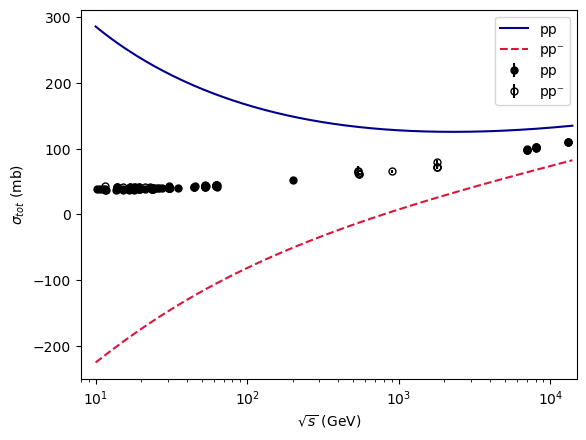

In [9]:
fh = F_h(sqrt_s, h1, h2, h3)
fr_p = Fr_plus(sqrt_s, c_p, ar_p)
fr_m = Fr_min(sqrt_s, c_m, ar_m)

pp_sem = 0.38*sem_od_pp(sqrt_s, fh, fr_p, fr_m)
pp_bar_sem = 0.38*sem_od_pp_bar(sqrt_s, fh, fr_p, fr_m)

plt.plot(sqrt_s, pp_sem, label='pp', color='darkblue')
plt.errorbar(x_values[0], y_values[0], yerr_values[0], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.plot(sqrt_s,pp_bar_sem, label='pp⁻', color='crimson', linestyle='--')
plt.errorbar(x_values[1], y_values[1], yerr_values[1], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xlim(8, 15000)
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('$\sigma_{tot}$ (mb)')
plt.legend()
plt.show()

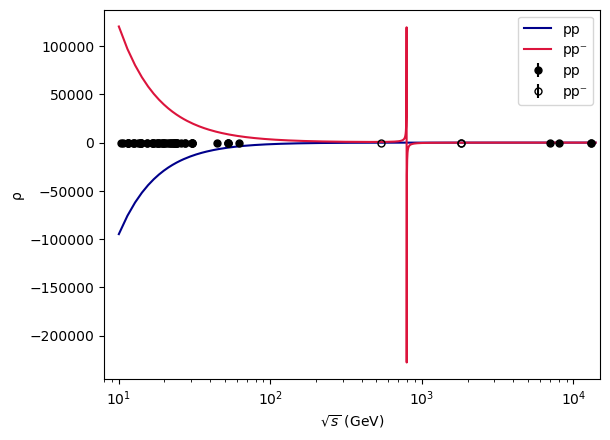

In [10]:
sum_pp = fh + fr_p + fr_m 
sum_pp_bar = fh + fr_p - fr_m 

rho_pp = rho_wO(sum_pp)
rho_pp_bar = rho_wO(sum_pp_bar)

plt.plot(sqrt_s, rho_pp, color='darkblue', label='pp')
plt.errorbar(x_values[2], y_values[2], yerr_values[2], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[3], y_values[3], yerr_values[3], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.plot(sqrt_s, rho_pp_bar, color='crimson', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('ρ')
plt.legend()
plt.xlim(8, 15000)
plt.show()

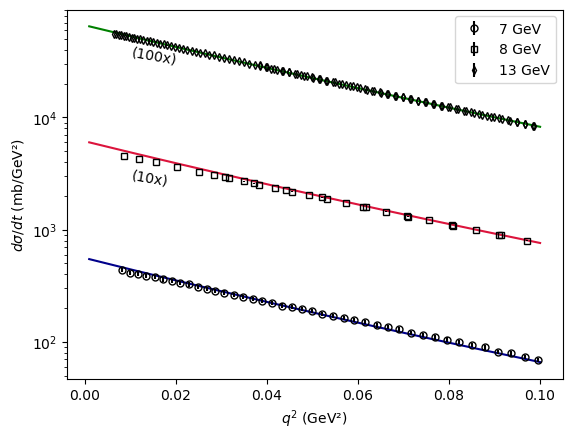

In [11]:
t = np.linspace(0.001, 0.1, 10000)

sig7 = F7(t, ar_p, ar_m, c_p, br_p, c_m, br_m, cp, beta_p)
sig8 = F8(t, ar_p, ar_m, c_p, br_p, c_m, br_m, cp, beta_p)
sig13 = F13(t, ar_p, ar_m, c_p, br_p, c_m, br_m, cp, beta_p)


plt.plot(t, sig7, color='darkblue')
plt.plot(t, 10*sig8, color='crimson')
plt.text(0.01, 10**3+1500, '(10x)', rotation=350)
plt.text(0.01, 10**4+20000, '(100x)', rotation=350)
plt.plot(t, 100*sig13, color='green')
plt.errorbar(x_values[4], y_values[4], yerr_values[4], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='7 GeV')
plt.errorbar(x_values[5], 10*y_values[5], yerr_values[5], fmt='s', markersize=5, mec='black', mfc='none', color='black', label='8 GeV')
plt.errorbar(x_values[6], 100*y_values[6], yerr_values[6], fmt='d', markersize=4, mec='black', mfc='none', color='black', label='13 GeV')
plt.yscale('log')
plt.xlabel('$q^2$ (GeV²) ')
plt.ylabel('$d\sigma/dt$ (mb/GeV²)')
plt.savefig('dsig_dt')
plt.legend(loc='best')
plt.show()

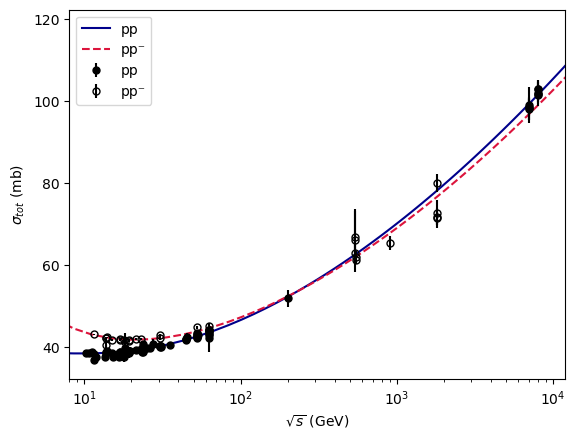

In [12]:


s_values = []
sig_tot = []

df = pd.read_csv('data/sig_pp.dat', delim_whitespace=True)
df.columns = ['sqrt_s', 'sig_tot']

df0 = pd.read_csv('data/sig_pp_bar.dat', delim_whitespace=True)
df0.columns = ['sqrt_s', 'sig_tot']

plt.plot(df['sqrt_s'].to_numpy(), df['sig_tot'].to_numpy(), color='darkblue', label='pp')
plt.plot(df0['sqrt_s'].to_numpy(), df0['sig_tot'].to_numpy(), color='crimson', linestyle='--', label='pp⁻')

plt.errorbar(x_values[0], y_values[0], yerr_values[0], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[1], y_values[1], yerr_values[1], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('$\sigma_{tot}$ (mb)')
plt.xlim(8, 10**4+2000)
plt.savefig('sig_tot.png')
plt.legend()
plt.show()



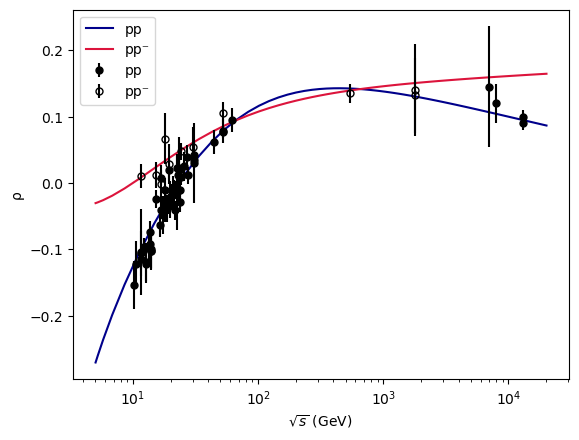

In [13]:
s_values = []
sig_tot = []

df = pd.read_csv('data/rho_pp.dat', delim_whitespace=True)
df.columns = ['sqrt_s', 'sig_tot']

df0 = pd.read_csv('data/rho_pp_bar.dat', delim_whitespace=True)
df0.columns = ['sqrt_s', 'sig_tot']

plt.plot(df['sqrt_s'].to_numpy(), df['sig_tot'].to_numpy(), color='darkblue', label='pp')
plt.plot(df0['sqrt_s'].to_numpy(), df0['sig_tot'].to_numpy(), color='crimson', label='pp⁻')
plt.errorbar(x_values[2], y_values[2], yerr_values[2], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[3], y_values[3], yerr_values[3], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV) ')
plt.ylabel('ρ')
plt.savefig('rho.png')
plt.legend()
plt.show()


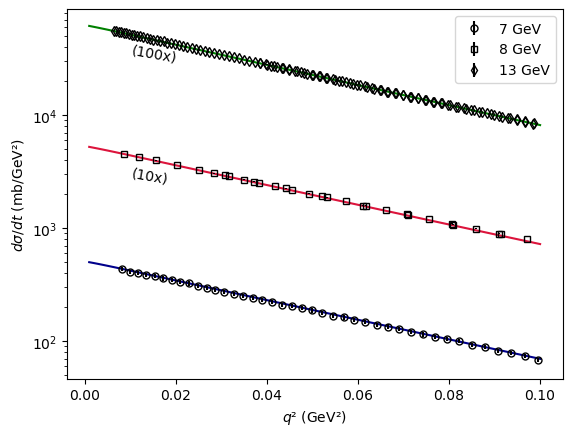

In [14]:
s_values = []
sig_tot = []

df = pd.read_csv('data/dsig7.dat', delim_whitespace=True)
df.columns = ['sqrt_s', 'sig_tot']

df0 = pd.read_csv('data/dsig8.dat', delim_whitespace=True)
df0.columns = ['sqrt_s', 'sig_tot']

df1 = pd.read_csv('data/dsig13.dat', delim_whitespace=True)
df1.columns = ['sqrt_s', 'sig_tot']

plt.plot(df['sqrt_s'].to_numpy(), df['sig_tot'].to_numpy(), color='darkblue')
plt.plot(df0['sqrt_s'].to_numpy(), 10*df0['sig_tot'].to_numpy(), color='crimson')
plt.plot(df1['sqrt_s'].to_numpy(), 100*df1['sig_tot'].to_numpy(), color='green')
plt.text(0.01, 10**3+1500, '(10x)', rotation=350)
plt.text(0.01, 10**4+20000, '(100x)', rotation=350)
plt.errorbar(x_values[4], y_values[4], yerr_values[4], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='7 GeV')
plt.errorbar(x_values[5], 10*y_values[5], yerr_values[5], fmt='s', markersize=5, mec='black', mfc='none', color='black', label='8 GeV')
plt.errorbar(x_values[6], 100*y_values[6], yerr_values[6], fmt='d', markersize=5, mec='black', mfc='none', color='black', label='13 GeV')
plt.yscale('log')
plt.xlabel('$q²$ (GeV²) ')
plt.ylabel('$d\sigma/dt$ (mb/GeV²)')
plt.savefig('dsigdt.png')
plt.legend()
plt.show()
